In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
%config Completer.use_jedi = False

In [3]:
!pip install -Uqq fastai duckduckgo_search

^C
ERROR: Operation cancelled by user


In [4]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [9]:
urls = search_images('tree', 1)
urls[0]

Searching for 'tree'


'https://www.publicdomainpictures.net/pictures/50000/velka/tree-1369547920oel.jpg'

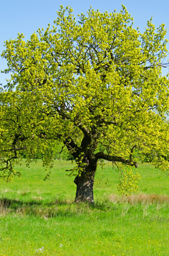

In [6]:
from fastdownload import download_url
dest = 'tree.jpg'
download_url(urls[0], dest, show_progress=True)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256, 256)

Searching for 'tree with bird'


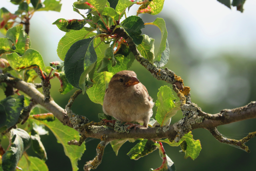

In [7]:
download_url(search_images('tree with bird', 1)[0], 'tree_with_bird.jpg', show_progress=False)
Image.open('tree_with_bird.jpg').to_thumb(256, 256)

Searching for 'bird'


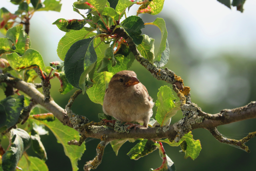

In [16]:
download_url(search_images('bird', 1)[0], 'bird.jpg', show_progress=False)
Image.open('tree_with_bird.jpg').to_thumb(256, 256)

In [17]:
searches = 'tree', 'tree_with_bird', 'bird'
path = Path('tree_bird_tree_w_bird')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} sun photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} shade photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'tree photo'
Searching for 'tree sun photo'
Searching for 'tree shade photo'
Searching for 'tree_with_bird photo'
Searching for 'tree_with_bird sun photo'
Searching for 'tree_with_bird shade photo'
Searching for 'bird photo'
Searching for 'bird sun photo'
Searching for 'bird shade photo'


In [18]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

3

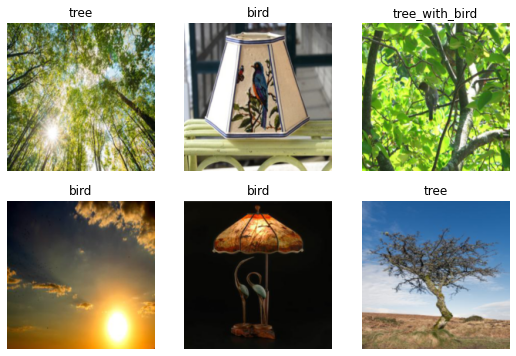

In [19]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [20]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,1.766602,0.505523,0.169811,00:03


epoch,train_loss,valid_loss,error_rate,time
0,0.933764,0.400139,0.113208,00:02
1,0.711254,0.359507,0.132075,00:02
2,0.534226,0.373120,0.150943,00:02
3,0.428446,0.335356,0.132075,00:02
4,0.338406,0.315722,0.094340,00:02
5,0.274754,0.287537,0.113208,00:02
6,0.224889,0.269793,0.132075,00:02
7,0.190575,0.258200,0.113208,00:02
8,0.167523,0.262773,0.132075,00:02
9,0.144703,0.266707,0.150943,00:02


In [31]:
is_tree,_,probs = learn.predict(PILImage.create('tree.jpg'))
print(f"This is a: {is_tree}.")
print(f"Probability it's a tree: {probs[1]:.4f}")
print(probs)

This is a: tree.
Probability it's a tree: 0.9960
TensorBase([9.8159e-04, 9.9600e-01, 3.0212e-03])


In [32]:
is_tree,_,probs = learn.predict(PILImage.create('bird.jpg'))
print(f"This is a: {is_tree}.")
print(f"Probability it's a tree: {probs[1]:.4f}")
print(probs)

This is a: bird.
Probability it's a tree: 0.0000
TensorBase([6.6352e-01, 2.6073e-05, 3.3645e-01])


In [33]:
is_tree,_,probs = learn.predict(PILImage.create('tree_with_bird.jpg'))
print(f"This is a: {is_tree}.")
print(f"Probability it's a tree: {probs[1]:.4f}")
print(probs)

This is a: tree_with_bird.
Probability it's a tree: 0.0000
TensorBase([1.1651e-04, 7.0876e-06, 9.9988e-01])


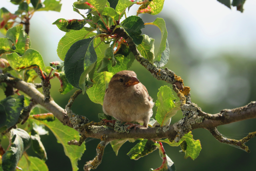

In [34]:
Image.open('tree_with_bird.jpg').to_thumb(256, 256)

In [27]:
ret = learn.predict(PILImage.create('bird.jpg'))
ret

('bird', TensorBase(0), TensorBase([6.6352e-01, 2.6073e-05, 3.3645e-01]))

In [29]:
dest='test1_bird.jpg'
download_url(search_images('bird', 1)[0], dest, show_progress=True)

Searching for 'bird'


Path('test1_bird.jpg')

In [36]:
is_tree,_,probs = learn.predict(PILImage.create('../input/fastaiweek1testset/t2_twb.jpeg'))
print(f"This is a: {is_tree}.")
print(f"Probability it's a tree: {probs[1]:.4f}")
print(probs)

This is a: tree_with_bird.
Probability it's a tree: 0.1151
TensorBase([0.0019, 0.1151, 0.8830])
